In [24]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# import csv data files
education_file = "Resources/education.csv"
childmarriage_file = "Resources/childmarriage.csv"

# create dataframes for each
education_file_df = pd.read_csv(education_file, encoding="ISO-8859-1")
childmarriage_file_df = pd.read_csv(childmarriage_file, encoding="ISO-8859-1")
countries_df = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

#education_file_df.head()
#childmarriage_file_df.head()
#countries_df[0]

In [25]:
filtered_education = education_file_df.filter(["Indicator"== "Youth literacy rate, population 15-24 years, both sexes (%)",
                                              "LOCATION", "Country","TIME", "Value"])
filtered_education.head()                       

,LOCATION,Country,TIME,Value
0,MAR,Morocco,1982,0.53256
1,MAR,Morocco,1994,0.64434
2,MAR,Morocco,2004,0.74865
3,MAR,Morocco,2008,0.81461
4,MAR,Morocco,2009,0.83185


In [26]:
childmarriage_file_df.head()
clean_childmarriage=childmarriage_file_df[['Geographic Area','Indicator','Sex','Time Period','Current Age',
                           'Observation Value','Unit of Measure','The period of time for which data are provided']]
clean_childmarriage = clean_childmarriage.rename(columns={"Geographic Area":"Country"})
clean_childmarriage.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,The period of time for which data are provided
0,Botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,1988
1,Uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,2002
2,Philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,2003
3,South Africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,2003
4,South Africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,2003


In [27]:
countries_df[0]
clean_countries = countries_df[0].rename(columns={"name":"Country","country":"Abbr"})
clean_countries.head()

,Abbr,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [28]:
# make country lowercase
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda x: x.lower())
clean_countries["Country"] = clean_countries["Country"].map(lambda x: x.lower())
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())

In [29]:
childmarriage_final = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
childmarriage_final = childmarriage_final.drop(columns=["The period of time for which data are provided","Abbr"])
childmarriage_final
childmarriage_final.head()

,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017
3,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,0.8,%,-30.559482,22.937506
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506


In [30]:
education_final = pd.merge(filtered_education, clean_countries, how="left", on="Country")
education_final = education_final.drop(columns=["LOCATION","Abbr"])
education_final.head()

,Country,TIME,Value,latitude,longitude
0,morocco,1982,0.53256,31.791702,-7.09262
1,morocco,1994,0.64434,31.791702,-7.09262
2,morocco,2004,0.74865,31.791702,-7.09262
3,morocco,2008,0.81461,31.791702,-7.09262
4,morocco,2009,0.83185,31.791702,-7.09262


In [31]:
# Question 1: Is rate of child marriage decreasing with each year? (line graph and histogram)

In [32]:
# Question 2: What is the correlation of literacy rate and child marriage? (scatter plot with regression line and boxplot) 

In [33]:
# Question 3: What is the geographical impact on child marriage and education? (heat map one for education and one for child marriage)

(-1.1187489980859993,
 1.1008928094326667,
 -1.107986685602429,
 1.1198953392663173)

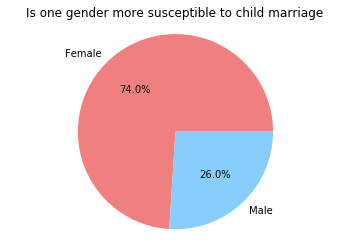

In [34]:
# Question 4: Is one gender more susceptible to child marriage than the other? (pie graph)
gender_df = childmarriage_final.groupby('Sex')['Sex'].count()
gender = ["Female", "Male"] 
colors = ['lightcoral', 'lightskyblue']

plt.pie(gender_df,labels=gender, autopct="%1.1f%%",colors=colors, shadow=False, startangle=0)
plt.title("Is one gender more susceptible to child marriage")
plt.axis("equal")

#lt.savefig("../Images/Gender_childmarriage.png")
#plt.show()

In [35]:
gender1_df = childmarriage_final.loc[(childmarriage_final['Indicator']=='Percentage of women (aged 20-24 years) married or in union before age 18')|(childmarriage_final['Indicator']=='Percentage of men (aged 20-24 years) married or in union before age 18')]
gender1_df


,Country,Indicator,Sex,Time Period,Current Age,Observation Value,Unit of Measure,latitude,longitude
0,botswana,Percentage of women (aged 20-24 years) married...,Female,1988,20 to 24 years old,10.0,%,-22.328474,24.684866
1,uzbekistan,Percentage of men (aged 20-24 years) married o...,Male,2002,20 to 24 years old,0.5,%,41.377491,64.585262
2,philippines,Percentage of men (aged 20-24 years) married o...,Male,2003,20 to 24 years old,2.9,%,12.879721,121.774017
4,south africa,Percentage of women (aged 20-24 years) married...,Female,2003,20 to 24 years old,5.6,%,-30.559482,22.937506
5,cabo verde,Percentage of men (aged 20-24 years) married o...,Male,2005,20 to 24 years old,3.0,%,NaN,NaN
...,...,...,...,...,...,...,...,...,...
334,albania,Percentage of men (aged 20-24 years) married o...,Male,2018,20 to 24 years old,1.2,%,41.153332,20.168331
335,benin,Percentage of men (aged 20-24 years) married o...,Male,2018,20 to 24 years old,4.8,%,9.307690,2.315834
339,albania,Percentage of women (aged 20-24 years) married...,Female,2018,20 to 24 years old,11.8,%,41.153332,20.168331
340,indonesia,Percentage of women (aged 20-24 years) married...,Female,2018,20 to 24 years old,11.2,%,-0.789275,113.921327


(-1.1104015257670696,
 1.10049535343878,
 -1.1230708828196667,
 1.1130014718327983)

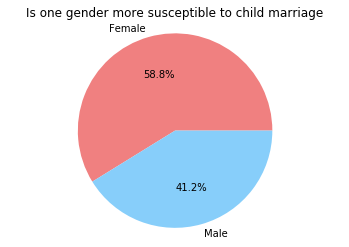

In [36]:
gender1_df = gender1_df.groupby('Sex')['Sex'].count()
gender = ["Female", "Male"] 
colors = ['lightcoral', 'lightskyblue']

plt.pie(gender1_df,labels=gender, autopct="%1.1f%%",colors=colors, shadow=False, startangle=0)
plt.title("Is one gender more susceptible to child marriage")
plt.axis("equal")

#lt.savefig("../Images/Gender_childmarriage.png")
#plt.show()

In [ ]:
# Conclusion: our null hypothesis is that education has no impact on child marriage rates.

In [ ]:
list1 = list(clean_childmarriage["Country"].unique())
list2 = list(clean_countries["Country"].unique())

print(len(list1), len(list2))

In [ ]:
clean_childmarriage["Country"] = clean_childmarriage["Country"].map(lambda x: x.lower())
clean_childmarriage.head()

In [ ]:
clean_countries["Country"] = clean_countries["Country"].map(lambda x: x.lower())
clean_countries.head()

In [ ]:
df_merge = pd.merge(clean_childmarriage, clean_countries, how="left", on="Country")
df_merge.head()

In [ ]:
df_merge["Country"].unique()

In [ ]:
df_merge.loc[df_merge.isnull().any(axis=1)]

In [ ]:
df_merge.dtypes

In [ ]:
df_merge = df_merge.rename(columns={
    "Time Period":"TIME"
})
df_merge = df_merge.drop(columns=['The period of time for which data are provided'])
df_merge.head(1)


In [ ]:
filtered_education.head(1)

In [ ]:
filtered_education = filtered_education.drop(columns="LOCATION")
filtered_education.head(1)

In [ ]:
filtered_education["Country"] = filtered_education["Country"].map(lambda z: z.lower())
filtered_education.head(1)

In [ ]:
df_merge.shape

In [ ]:
filtered_education.shape

In [ ]:
df_merge[["Country", "TIME"]].nunique()

In [ ]:
filtered_education[["Country", "TIME"]].nunique()

In [ ]:
quick_merge_df = pd.merge(df_merge, filtered_education, on=["Country", "TIME"])
quick_merge_df

In [ ]:
quick_merge_df

In [ ]:
quick_merge_df = pd.merge(df_merge, filtered_education, on=["Country", "TIME"], how="outer")
quick_merge_df.shape

In [ ]:
quick_merge_df.loc[quick_merge_df.isnull().any(axis=1)]

In [ ]:
filtered_education.dtypes

In [ ]:
df_merge.shape

In [ ]:
df_merge = df_merge.dropna(axis=0)
df_merge.shape

In [ ]:
df_merge.shape

In [ ]:
df_merge = df_merge.dropna(axis=0)
df_merge.shape

In [ ]:
clean_countries["Country"].unique()

In [ ]:
# Merge the child marriage dataframe with the education dataframe
new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])


merge_df=pd.merge(pd.merge(clean_childmarriage,clean_countries,on='Country',),filtered_education,on='Country')
merge_df.dropna()
merge_df = merge_df.drop(columns=['The period of time for which data are provided'])
merge_df
#clean_df=merge_df.drop_duplicates('SN')

In [ ]:
print(merge_df["views"].max())
print(merge_df["views"].min())

In [ ]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 199999, 399999, 599999, 799999, 999999,
        1999999, 2999999, 3999999, 4999999, 50000000]

# Create labels for these bins
group_labels = ["0 to 199k", "200k to 399k", "400k to 599k", "600k to 799k", "800k to 999k", "1mil to 2mil",
                "2mil to 3mil", "3mil to 4mil", "4mil to 5mil", "5mil to 50mil"]

pd.cut(ted_df["views"], bins, labels=group_labels).head()

# Place the data series into a new column inside of the DataFrame
ted_df["View Group"] = pd.cut(ted_df["views"], bins, labels=group_labels)
ted_df.head()